<a href="https://colab.research.google.com/github/Rakib-Ul-Haque/SecureK-NN/blob/master/SecureK_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **General K-NN with Manhattan Distance at 10K-fold for BCWD data** 

In [ ]:
# Library Declaration  
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Input
df = pd.read_table('breast-cancer-wisconsin.data', sep=',', names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin", "Normal Nucleoli","Mitoses","Class"]) 
print(df.head)

<bound method NDFrame.head of      Sample code number  Clump Thickness  ...  Mitoses  Class
0               1000025                5  ...        1      2
1               1002945                5  ...        1      2
2               1015425                3  ...        1      2
3               1016277                6  ...        1      2
4               1017023                4  ...        1      2
..                  ...              ...  ...      ...    ...
694              776715                3  ...        1      2
695              841769                2  ...        1      2
696              888820                5  ...        2      4
697              897471                4  ...        1      4
698              897471                4  ...        1      4

[699 rows x 11 columns]>


In [ ]:
# Data Cleaning
df["Bare Nuclei"][df["Bare Nuclei"]=='?']='0'
df["Bare Nuclei"] = df["Bare Nuclei"].astype(str).astype(int)
df.info()
# pd.to_numeric(df["Bare Nuclei"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [ ]:
# Data Cleaning
df=df.drop(["Sample code number"], axis = 1)
print(df.shape)

(699, 10)


In [ ]:
# Data Cleaning
def Class_value(Class): 
     if Class == 2: 
         return 1
     else: 
         return 0
  
df['Class'] = df['Class'].apply(Class_value) 
#df['Class'].head(10)

In [ ]:
# Data Preparing
X = np.array(df.iloc[:, :9]) 
y = np.array(df['Class']) 

In [ ]:
# Data Preparing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 15, metric='manhattan')# metric='euclidean') #metric='minkowski') 
# knn.fit(X_train, y_train) 
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# knn.score(X_test, y_test) 
# y_pred=knn.predict(X_test)
# acc=(metrics.accuracy_score(y_test,y_pred)*100)
# acc    
# knn.score(X_test, y_test) 
# from sklearn.metrics import precision_score
# pre=(precision_score(y_test,y_pred)) #average='binary')*100)
# pre
# from sklearn.metrics import recall_score
# rec=(recall_score(y_test,y_pred))# average='binary')*100)
# rec
# from sklearn.metrics import f1_score
# f1=(f1_score(y_test,y_pred))# average='binary')*100)
# f1 

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
#train model with cv of 10
accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accK)
print("Acuracy:",np.mean(accK)*100)

preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preK)
print("Precision:",np.mean(preK)*100)

recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recK)
print("Recall:",np.mean(recK)*100)

f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1K)
print("F1:",np.mean(f1K))

Acuracy: 96.95779220779221
Precision: 96.54468378152589
Recall: 96.84605658289868
F1: 0.9665920563589703


In [ ]:
#create Testing
kas=[]
kps=[]
krs=[]
kfs=[]
for k in range (1, 15):
  knn_cv = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  
  #accuracy
  accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
  kas.append((np.mean(accK)*100).round(2))
  # kas=kas.round(2)

  #precision
  preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
  kps.append((np.mean(preK)*100).round(2))
  # kps=kps.round(2)

  #recall
  recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
  krs.append((np.mean(recK)*100).round(2))
  # krs=krs.round(2)

  #Fs
  f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
  kfs.append((np.mean(f1K)).round(2))
  # kfs=kfs.round(2)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

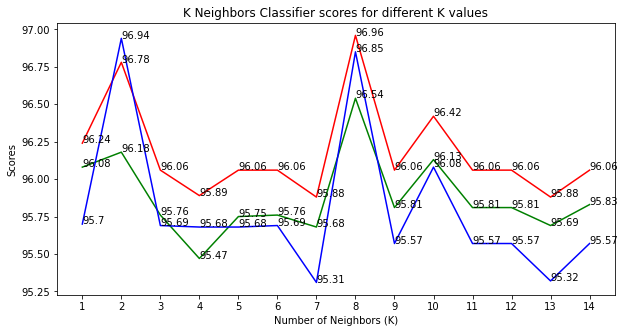

In [ ]:
#create Graph of Acc, pre, rec together
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
plt.plot([k for k in range(1, 15)], kps, color = 'green')
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
# plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
    plt.text(i, kps[i-1], (kps[i-1]))
    plt.text(i, krs[i-1], (krs[i-1]))
    # plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

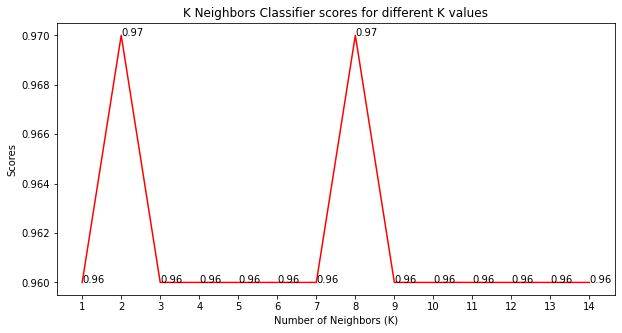

In [ ]:
#create Graph of Acc
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier accuracy for different K values')


[link text](https://)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

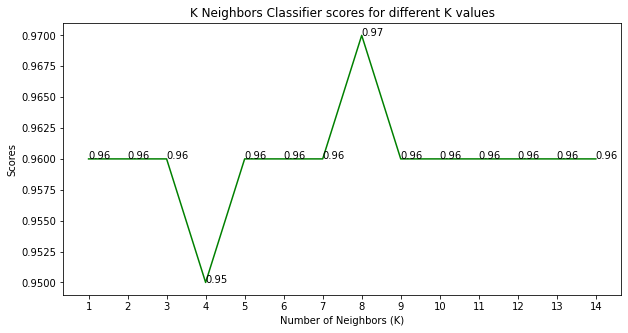

In [ ]:
#create Graph of pre
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kps, color = 'green')
for i in range(1,15):
    plt.text(i, kps[i-1], ( kps[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier precision for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

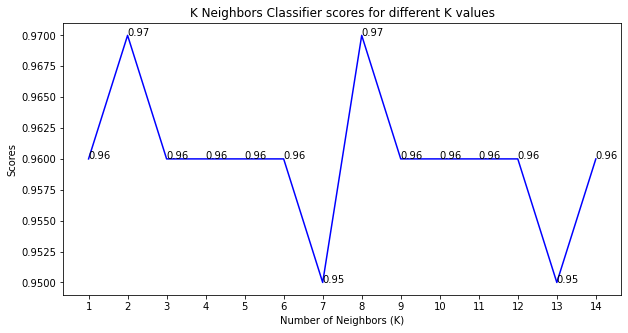

In [ ]:
#create Graph of rec
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
for i in range(1,15):
    plt.text(i, krs[i-1], (krs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Recall for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier F1-score for different K values')

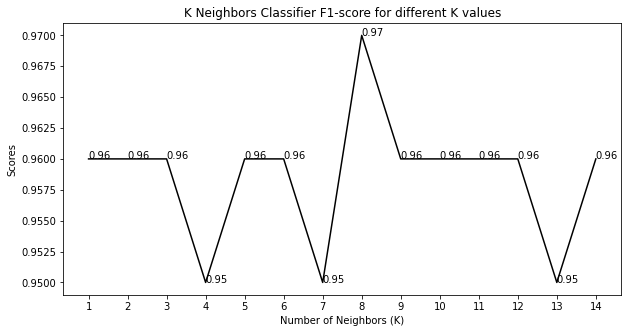

In [ ]:
#create Graph of F1
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier F1-score for different K values')

In [ ]:
# import matplotlib.pyplot as plt
# #plt.plot(xx, yy)
# #plt.show()
# #plt.savefig('f3.png')
# from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages(r'f3.pdf') as export_pdf:
#     plt.plot(xx,yy, color='red')
#     plt.title('Graph of RT activation function', fontsize=10)
#     plt.xlabel('Values of x', fontsize=8)
#     plt.ylabel('Values of f(x)', fontsize=8)
#     plt.grid(True)
#     export_pdf.savefig()
#     plt.close()

## **General SVM at 10K-Fold on BCWD**

In [ ]:
from sklearn import svm

In [ ]:
# from sklearn.model_selection import train_test_split
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
# clf = svm.SVC(kernel='linear') # Linear Kernel
# #Train the model using the training sets
# clf.fit(X_train, y_train)
# #Predict the response for test dataset
# y_pred = clf.predict(X_test)
# from sklearn import metrics
# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# from sklearn.model_selection import cross_val_score
# import numpy as np

In [ ]:
#create a new SVM model
clf = svm.SVC(kernel='linear')
#train model with cv of 10

accSVM = cross_val_score(clf, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accSVM)
print("Acuracy:",np.mean(accSVM)*100)
 
preSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preSVM)
print("Precision:",np.mean(preSVM)*100)

recSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recSVM)
print("Recall:",np.mean(recSVM)*100)

f1SVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1SVM)
print("F1:",np.mean(f1SVM))


Acuracy: 96.60389610389612
Precision: 96.16123077965183
Recall: 96.4571676940098
F1: 0.9628082152005861


## **General K-NN with Manhattan Distance at 10K-fold for HDD data**

In [ ]:
# Library Declaration  
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
#Input Data
# df = pd.read_table('reprocessed.hungarian.data', sep=' ', names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]) 
df = pd.read_csv("dataset.csv") 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# df=df[df.ca != '?']
# df=df[df.thal != '?']
# df["thal"] = df["thal"].astype(str).astype(float)
# df["ca"] = df["ca"].astype(str).astype(float)
# # df = df[:-1]

# print(df)
# df.info()

# df
# # performing linear algebra 
# import numpy as np    
# # data processing 
# import pandas as pd 
# df = pd.read_table('reprocessed.hungarian.data', sep=',', names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]) 
# # df.head(3)
#df = df[:-1]
# print(df)
# df=df[df.ca != '?']
# df=df[df.thal != '?']
# df["thal"] = df["thal"].astype(str).astype(float)
# df["ca"] = df["ca"].astype(str).astype(float)
# df.info()
# X = np.array(df.iloc[:, :13])
# y = np.array(df['target'])

In [ ]:
#preparing data
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
#preparing data
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
#preparing data
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [ ]:
#preparing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
#train model with cv of 10

accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accK)
print("Acuracy:",np.mean(accK)*100)

preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preK)
print("Precision:",np.mean(preK)*100)

recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recK)
print("Recall:",np.mean(recK)*100)

f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1K)
print("F1:",np.mean(f1K))

Acuracy: 83.5
Precision: 83.79961704961704
Recall: 83.45154845154846
F1: 0.8326320523277044


In [ ]:
#create Testing
kas=[]
kps=[]
krs=[]
kfs=[]
for k in range (1, 15):
  knn_cv = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  
  #accuracy
  accK = cross_val_score(knn_cv, X_train, y_train, cv=10)
  kas.append((np.mean(accK)*100).round(2))
  # kas=kas.round(2)

  #precision
  preK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='precision_macro')
  kps.append((np.mean(preK)*100).round(2))
  # kps=kps.round(2)

  #recall
  recK = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='recall_macro')
  krs.append((np.mean(recK)*100).round(2))
  # krs=krs.round(2)

  #Fs
  f1K = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='f1_macro')
  kfs.append((np.mean(f1K)).round(2))
  # kfs=kfs.round(2)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

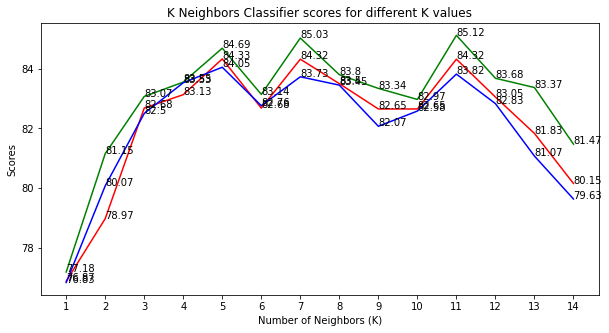

In [ ]:
#create Graph of Acc, pre, rec together
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
plt.plot([k for k in range(1, 15)], kps, color = 'green')
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
# plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
    plt.text(i, kps[i-1], (kps[i-1]))
    plt.text(i, krs[i-1], (krs[i-1]))
    # plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


Text(0.5, 1.0, 'K Neighbors Classifier accuracy for different K values')

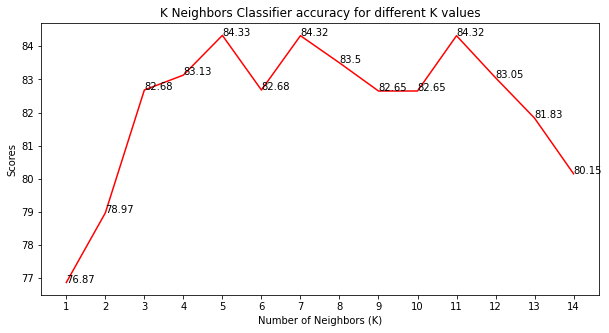

In [ ]:
#create Graph of Acc
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kas, color = 'red')
for i in range(1,15):
    plt.text(i, kas[i-1], (kas[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier accuracy for different K values')


Text(0.5, 1.0, 'K Neighbors Classifier precision for different K values')

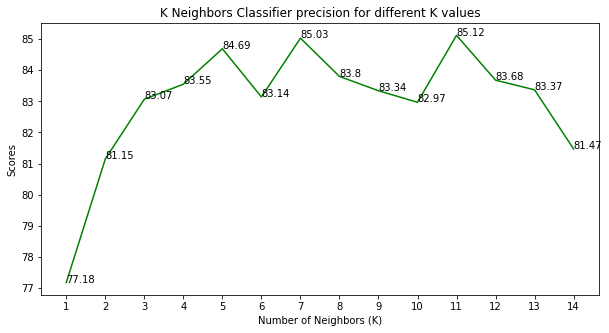

In [ ]:
#create Graph of pre
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kps, color = 'green')
for i in range(1,15):
    plt.text(i, kps[i-1], ( kps[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier precision for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier Recall for different K values')

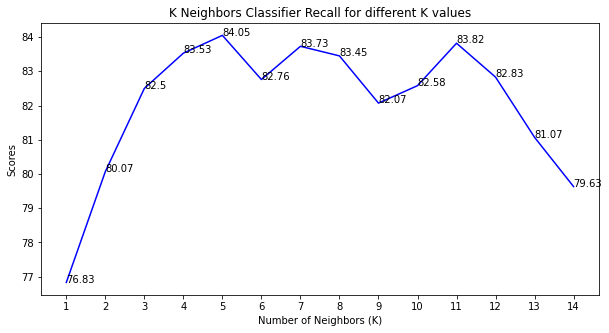

In [ ]:
#create Graph of rec
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], krs, color = 'blue')
for i in range(1,15):
    plt.text(i, krs[i-1], (krs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Recall for different K values')

Text(0.5, 1.0, 'K Neighbors Classifier F1-score for different K values')

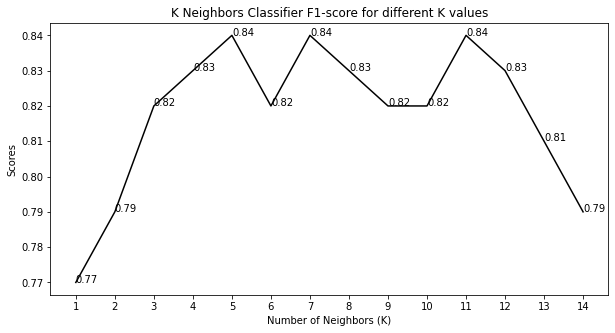

In [ ]:
#create Graph of F1-score
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1, 15)], kfs, color = 'black')
for i in range(1,15):
    plt.text(i, kfs[i-1], (kfs[i-1]))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier F1-score for different K values')

## **General SVM at 10K-Fold on HDD**

In [ ]:
from sklearn import svm

In [ ]:
#create a new SVM model
clf = svm.SVC(kernel='linear')
#train model with cv of 10

accSVM = cross_val_score(clf, X_train, y_train, cv=10)
#print each cv score (accuracy) and average them
# print(accSVM)
print("Acuracy:",np.mean(accSVM)*100)
 
preSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro')
#print each cv score (Precision) and average them
# print(preSVM)
print("Precision:",np.mean(preSVM)*100)

recSVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro')
#print each cv score (Recall) and average them
# print(recSVM)
print("Recall:",np.mean(recSVM)*100)

f1SVM = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
#print each cv score (F1-Score) and average them
# print(f1SVM)
print("F1:",np.mean(f1SVM))

Acuracy: 81.00000000000001
Precision: 81.7854473957415
Recall: 80.38111888111888
F1: 0.8046998727386164


In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 9, metric='manhattan')# metric='euclidean') #metric='minkowski') 
# knn.fit(X_train, y_train) 
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# y_pred=knn.predict(X_test)
# from sklearn import metrics 
# from sklearn.metrics import precision_recall_fscore_support
# acc=(metrics.accuracy_score(y_test,y_pred)*100)
# acc 
# knn.score(X_test, y_test) 
# from sklearn.metrics import precision_score
# pre=(precision_score(y_test,y_pred, average='macro')*100)
# pre
# from sklearn.metrics import recall_score
# rec=(recall_score(y_test,y_pred, average='macro')*100)
# rec 
# from sklearn.metrics import f1_score
# f1=(f1_score(y_test,y_pred, average='macro'))
# f1

## **Pailler basic encryption and decryption**

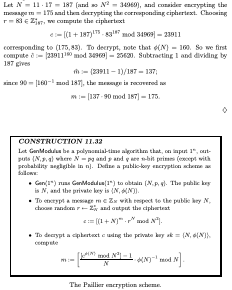

In [5]:
# !apt-get install libgmp-dev libmpfr-dev libmpc-dev
# !pip install gmpy
# !pip install gmpy2
# import gmpy
# from gmpy import * 
# x=gmpy.invert(12, 35)
# x

In [5]:
#Importing libraries
import math
import sympy
from sympy import *
# from sympy import mod_inverse

In [6]:
# Generating key's public and private 
def get_lcm(n1,n2):
  #find gcd
  gcd = math.gcd(n1,n2)
   
  #formula 
  result = (n1*n2)/gcd
  return result

p=11
q=17
N=p*q
N_sq = int(math.pow(N,2))
phi_n = int(((p-1)*(q-1)))

# lam_n =int(get_lcm((p-1),(q-1)))
# g = int((n+1))
# x=int(((pow(g,lam_n))%n_sq))
# Lf=int((x-1)/n)
# u=mod_inverse(Lf, n)
 
print("Prime number p:",p)
print("Prime number q:",q)
print("modulus n:",N)
print("spuare of modulus n_square:",N_sq)
print("φ(n):",phi_n)

# print("λ(n):",lam_n)
# print("g:",g)
# print("u:",u)
print("Public Key (N): (",N,")")
print("Private Key (N,φ(n)): (",N,",",phi_n,")")

Prime number p: 11
Prime number q: 17
modulus n: 187
spuare of modulus n_square: 34969
φ(n): 160
Public Key (N): ( 187 )
Private Key (N,φ(n)): ( 187 , 160 )


In [10]:
#encryption
m=175
r=83
f=int((pow((1+N),m))*(pow(r,N)))
c=int(f%N_sq)
print("Original Message (M): (",m,")")
print("Encrypted Message (C): (",c,")")

Original Message (M): ( 175 )
Encrypted Message (C): ( 23911 )


In [11]:
#decryption
dlf1=int((pow(c,phi_n)%N_sq))
p1=int(((dlf1-1)/N))

dss=int(mod_inverse(phi_n, N))

result=int((p1*dss)%N)
# result
print("Decrypted Message (D): (",result,")")

Decrypted Message (D): ( 175 )


In [14]:
# # Generating key's public and private 
# def get_lcm(n1,n2):
#   #find gcd
#   gcd = math.gcd(n1,n2)
   
#   #formula 
#   result = (n1*n2)/gcd
#   return result

# p=5
# q=7
# n=p*q
# n_sq = int(math.pow(n,2))
# phi_n = int(((p-1)*(q-1)))
# lam_n =int(get_lcm((p-1),(q-1)))
# g = int((n+1))
# x=int(((pow(g,lam_n))%n_sq))
# Lf=int((x-1)/n)
# u=mod_inverse(Lf, n)
 
# print("Prime number p:",p)
# print("Prime number q:",q)
# print("modulus n:",n)
# print("spuare of modulus n_square:",n_sq)
# print("φ(n):",phi_n)
# print("λ(n):",lam_n)
# print("g:",g)
# print("u:",u)
# print("Public Key (n,g): (",n,",",g,")")
# print("Private Key (p,q,λ(n)): (",p,",",q,",",lam_n,")")

In [12]:
# #encryption
# m=4
# r=2
# f=int((pow(g,m))*(pow(r,n)))
# c=int(f%n_sq)
# c

In [13]:
# #decryption
# dlf1=int((pow(c,lam_n)%n_sq))
# p1=int(((dlf1-1)/n))

# dlf2=int((pow(g,lam_n)%n_sq))
# p2=int(((dlf2-1)/n))

# dss=int(mod_inverse(p2, n))

# result=int((p1*dss)%n)
# result

## **Pailler basic operations addition and subtraction (m1>=m2)**

In [92]:
#Importing libraries
import math
import sympy
from sympy import *
# from sympy import mod_inverse

In [93]:
# Generating key's public and private 
def get_lcm(n1,n2):
  #find gcd
  gcd = math.gcd(n1,n2)
   
  #formula 
  result = (n1*n2)/gcd
  return result

p=11
q=17
N=p*q
N_sq = int(math.pow(N,2))
phi_n = int(((p-1)*(q-1)))

 
print("Prime number p:",p)
print("Prime number q:",q)
print("modulus n:",N)
print("spuare of modulus n_square:",N_sq)
print("φ(n):",phi_n)
print("Public Key (N): (",N,")")
print("Private Key (N,φ(n)): (",N,",",phi_n,")")

Prime number p: 11
Prime number q: 17
modulus n: 187
spuare of modulus n_square: 34969
φ(n): 160
Public Key (N): ( 187 )
Private Key (N,φ(n)): ( 187 , 160 )


In [94]:
#encryption
m1=20
m2=20
r1=83
r2=81

f1=int((pow((1+N),m1))*(pow(r1,N)))
c1=int(f1%N_sq)

f2=int((pow((1+N),m2))*(pow(r2,N)))
c2=int(f2%N_sq)

print("Message1 (M1,C1): (",m1,",",c1,")")
print("Message2 (M2,C2): (",m2,",",c2,")")

Message1 (M1,C1): ( 20 , 14187 )
Message2 (M2,C2): ( 20 , 24535 )


In [95]:
#addition
add= ((c1*c2)%N_sq)

In [96]:
#subtraction
rcal=int(mod_inverse(c1,N_sq))
sub= ((c2*rcal)%N_sq)

In [97]:
#decryption
dlf1=int((pow(c1,phi_n)%N_sq))
p1=int(((dlf1-1)/N))

dlf2=int((pow(c2,phi_n)%N_sq))
p2=int(((dlf2-1)/N))

# dlf3=int((pow(add,phi_n)%N_sq))
# p3=int(((dlf3-1)/N))

dlf3=int((pow(sub,phi_n)%N_sq))
p3=int(((dlf3-1)/N))

dss=int(mod_inverse(phi_n, N))

D1=int((p1*dss)%N)
D2=int((p2*dss)%N)
D3=int((p3*dss)%N)
print("Decrypted Message (D1): (",D1,")")
print("Decrypted Message (D2): (",D2,")")
print("Decrypted Message and original Message additon: (",add,",",D3,")")
# print("Decrypted Message and original Message subtraction: (",sub,",",D4,")")

Decrypted Message (D1): ( 20 )
Decrypted Message (D2): ( 20 )
Decrypted Message and original Message additon: ( 31588 , 0 )


In [16]:
# # Generating key's public and private 
# def get_lcm(n1,n2):
#   #find gcd
#   gcd = math.gcd(n1,n2)
   
#   #formula 
#   result = (n1*n2)/gcd
#   return result

# p=5
# q=7
# n=p*q
# n_sq = int(math.pow(n,2))
# phi_n = int(((p-1)*(q-1)))
# lam_n =int(get_lcm((p-1),(q-1)))
# g = int((n+1))
# x=int(((pow(g,lam_n))%n_sq))
# Lf=int((x-1)/n)
# u=mod_inverse(Lf, n)
 
# print("Prime number p:",p)
# print("Prime number q:",q)
# print("modulus n:",n)
# print("spuare of modulus n_square:",n_sq)
# print("φ(n):",phi_n)
# print("λ(n):",lam_n)
# print("g:",g)
# print("u:",u)
# print("Public Key (n,g): (",n,",",g,")")
# print("Private Key (p,q,λ(n)): (",p,",",q,",",lam_n,")")

# #encryption
# m=3.141592653
# r=2
# f=int((pow(g,m))*(pow(r,n)))
# c1=int(f%n_sq)
# c1

# #encryption
# m=16
# f=int((pow(g,m))*(pow(r,n)))
# c2=int(f%n_sq)
# c2

# #homomorphic addition
# add=((c1*c2)%n_sq)
# add

# #homomorphic subtraction
# sub=mod_inverse(c2,n_sq))
# subt=((c1*sub)%n_sq)
# subt

#homomorphic subtraction
# sub=mod_inverse(c1,n_sq)
# subt=(c2*sub)
# sdf=mod_inverse(subt,n_sq)
# sda=(sdf%n_sq)
# sda

# #decryption
# dlf1=int((pow(c1,lam_n)%n_sq))
# p1=int(((dlf1-1)/n))

# dlf2=int((pow(g,lam_n)%n_sq))
# p2=int(((dlf2-1)/n))

# dss=int(mod_inverse(p2, n))

# result=int((p1*dss)%n)
# result

## **IEEE 754 double precision floating-point format (64 bits long)**

In [98]:
import struct
 
getBin = lambda x: x > 0 and str(bin(x))[2:] or "-" + str(bin(x))[3:]
 
def floatToBinary64(value):
    val = struct.unpack('Q', struct.pack('d', value))[0]
    return getBin(val)
 
def binaryToFloat(value):
    hx = hex(int(value, 2))   
    return struct.unpack("d", struct.pack("q", int(hx, 16)))[0]
 
# floats are represented by IEEE 754 floating-point format which are 
# 64 bits long (not 32 bits)
 
# float to binary
binstr = floatToBinary64(19.5)
print('Binary equivalent of 19.5:')
print(binstr + '\n')
 
# binary to float
fl = binaryToFloat(binstr)
print('Decimal equivalent of ' + binstr)
print(fl)

Binary equivalent of 19.5:
100000000110011100000000000000000000000000000000000000000000000

Decimal equivalent of 100000000110011100000000000000000000000000000000000000000000000
19.5


## **IEEE 754 double precision floating-point format (64 bits long) with Pailler's encryption and decryption**

In [100]:
import struct
#Importing libraries
import math
import sympy
from sympy import *
#======================================= 

getBin = lambda x: x > 0 and str(bin(x))[2:] or "-" + str(bin(x))[3:]
 
def floatToBinary64(value):
    val = struct.unpack('Q', struct.pack('d', value))[0]
    return getBin(val)
 
def binaryToFloat(value):
    hx = hex(int(value, 2))   
    return struct.unpack("d", struct.pack("q", int(hx, 16)))[0]
 
# floats are represented by IEEE 754 floating-point format which are 
# 64 bits long (not 32 bits)
 
# float to binary
binstr = floatToBinary64(19.5)
print('Binary equivalent of 19.5:')
print(binstr + '\n')


Binary equivalent of 19.5:
100000000110011100000000000000000000000000000000000000000000000



In [109]:
type(binstr)


In [101]:
#==============Pailler=============================
# Generating key's public and private 
def get_lcm(n1,n2):
  #find gcd
  gcd = math.gcd(n1,n2)
   
  #formula 
  result = (n1*n2)/gcd
  return result

p=11
q=17
N=p*q
N_sq = int(math.pow(N,2))
phi_n = int(((p-1)*(q-1)))

 
print("Prime number p:",p)
print("Prime number q:",q)
print("modulus n:",N)
print("spuare of modulus n_square:",N_sq)
print("φ(n):",phi_n)
print("Public Key (N): (",N,")")
print("Private Key (N,φ(n)): (",N,",",phi_n,")")

Prime number p: 11
Prime number q: 17
modulus n: 187
spuare of modulus n_square: 34969
φ(n): 160
Public Key (N): ( 187 )
Private Key (N,φ(n)): ( 187 , 160 )


In [102]:
#encryption
m1=binstr
r1=83

f1=int((pow((1+N),m1))*(pow(r1,N)))
c1=int(f1%N_sq)

print("Message1 (M1,C1): (",m1,",",c1,")")

TypeError: ignored

In [ ]:
#decryption
dlf1=int((pow(c1,phi_n)%N_sq))
p1=int(((dlf1-1)/N))

dss=int(mod_inverse(phi_n, N))

D1=int((p1*dss)%N)
print("Decrypted Message (D1): (",D1,")")

In [ ]:

#===========================
 
# binary to float
fl = binaryToFloat(D1)
print('Decimal equivalent of ' + binstr)
print(fl)

## **SecureK-NN**